**1. Importieren der benötigten Module**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

**2. Datensatz laden**

In [2]:
mnist = tf.keras.datasets.mnist # load 28x28 images of handwritten digits
(train_samples, train_labels) = mnist.load_data()[0]
(test_samples, test_labels) = mnist.load_data()[1]

In [3]:
print(train_samples.shape, train_labels.shape)
print(test_samples.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


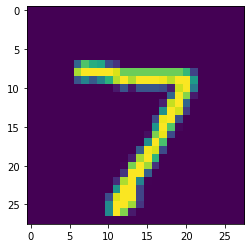

label: 7


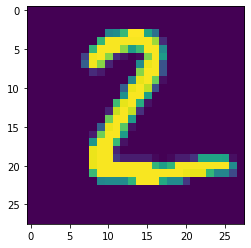

label: 2


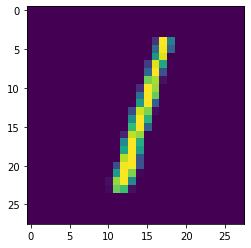

label: 1


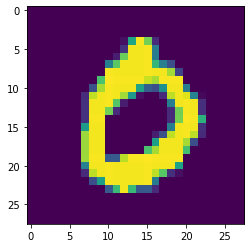

label: 0


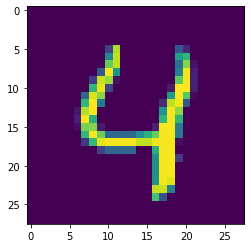

label: 4


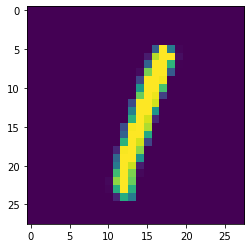

label: 1


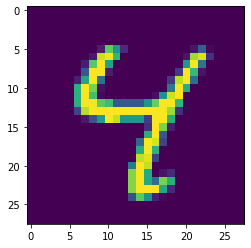

label: 4


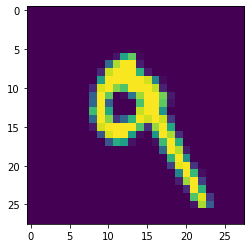

label: 9


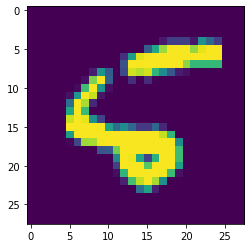

label: 5


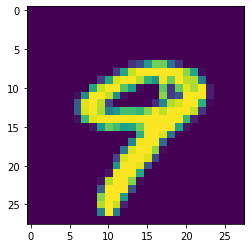

label: 9


In [4]:
for i in range(10):
    plt.imshow(test_samples[i])
    plt.show()
    print("label:", test_labels[i])

**3. Daten normieren**

In [5]:
# Werte zwischen 0 und 1. Nicht notwendig aber verbessert das Training signifikant.
train_samples = tf.keras.utils.normalize(train_samples, axis=1)
test_samples = tf.keras.utils.normalize(test_samples, axis=1)

**4. Netzwerk erstellen**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout, InputLayer
from tensorflow.keras.metrics import Accuracy

from tensorflow import keras
from tensorflow.keras import layers

**2 Modelle zur Auswahl:**\
Nur einen der nächsten zwei Codeblöcke ausführen!

In [7]:
# Nr. 1
model = Sequential([
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [188]:
# Nr. 2
model = Sequential([
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),   
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**5. Nezwerk trainieren**

In [9]:
history = model.fit(train_samples, train_labels, epochs=60, validation_split=0.1, batch_size=120, shuffle=True)

Epoch 1/60
450/450 [==============================] - 1s 1ms/step - loss: 0.4590 - accuracy: 0.8815 - val_loss: 0.2153 - val_accuracy: 0.9403
Epoch 2/60
450/450 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9359 - val_loss: 0.1682 - val_accuracy: 0.9517
Epoch 3/60
450/450 [==============================] - 0s 968us/step - loss: 0.1686 - accuracy: 0.9510 - val_loss: 0.1383 - val_accuracy: 0.9608
Epoch 4/60
450/450 [==============================] - 0s 982us/step - loss: 0.1338 - accuracy: 0.9614 - val_loss: 0.1264 - val_accuracy: 0.9615
Epoch 5/60
450/450 [==============================] - 0s 926us/step - loss: 0.1102 - accuracy: 0.9686 - val_loss: 0.1059 - val_accuracy: 0.9690
Epoch 6/60
450/450 [==============================] - 0s 939us/step - loss: 0.0921 - accuracy: 0.9733 - val_loss: 0.1013 - val_accuracy: 0.9687
Epoch 7/60
450/450 [==============================] - 0s 895us/step - loss: 0.0782 - accuracy: 0.9779 - val_loss: 0.0917 - val_accuracy: 0.9

In [14]:
# Kurve der Treffer-Genauigkeit des Modells mit Trainings- und Testdaten
def plot_accuracy(name, ylim=[0,1.01]):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(ylim[0], ylim[1])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.savefig(name)
    plt.show()

#plot_accuracy("accuracy_graph_1.png", ylim=[0.84,1.01])

In [15]:
# Kurve der Loss-Function des Modells mit Trainings- und Testdaten
def plot_loss(name, ylim=[-0.5,1]):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(ylim[0],ylim[1])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.savefig(name)
    plt.show()
    
#plot_loss("loss_graph_1.png", ylim=[-0.05,0.6])

**6. Netzwerk Vorhersagen treffen lassen**

In [12]:
predictions = model.predict(x=test_samples)

In [13]:
plt.plot(predictions.history['loss'])
plt.plot(predictions.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
plt.savefig("loss_graph.png")

AttributeError: 'numpy.ndarray' object has no attribute 'history'

In [14]:
for i in predictions:
    print(i)

[4.7115287e-19 6.6027249e-21 3.6752018e-17 3.7985127e-12 6.4836547e-25
 4.6407512e-18 8.2858293e-32 1.0000000e+00 7.3572382e-17 5.7262231e-15]
[5.78412312e-20 2.60328692e-09 1.00000000e+00 1.19304078e-09
 1.44316059e-32 1.13461482e-15 1.43499990e-10 1.31882780e-33
 1.19545945e-17 1.69394214e-36]
[3.5091082e-18 1.0000000e+00 4.3538927e-13 3.4633446e-12 2.2963979e-13
 9.3111735e-10 4.4089979e-13 1.2600960e-11 1.6212839e-09 1.5773244e-16]
[1.0000000e+00 7.3825327e-19 1.3196315e-09 2.4491219e-14 1.0890223e-17
 3.3445805e-13 2.8032623e-09 1.8882479e-10 2.3570701e-20 2.8277025e-12]
[2.0007399e-20 3.1774664e-26 5.7589508e-15 1.0857578e-17 1.0000000e+00
 1.0640392e-16 1.5442766e-14 2.4543874e-14 6.9562499e-14 1.2331101e-11]
[1.4868542e-14 9.9999845e-01 4.8710408e-15 5.9029076e-10 1.6623203e-13
 6.8007583e-12 1.8445538e-13 1.5770592e-06 7.4998328e-09 4.1260267e-15]
[1.0581081e-26 2.1763533e-19 3.8621892e-23 2.8958758e-19 1.0000000e+00
 4.7243730e-14 9.4405522e-22 4.6175215e-14 5.3400114e-12 2.2

 1.9971469e-17 9.9999774e-01 4.5106577e-18 3.2816610e-20 1.0686860e-24]
[1.5514931e-12 1.7123287e-16 9.9806935e-01 1.8951840e-06 3.8898860e-32
 2.3108770e-11 3.2290076e-21 1.8134338e-11 1.9287475e-03 1.5422198e-20]
[2.7305621e-18 7.5593170e-16 2.5674667e-17 8.9246335e-09 3.9829766e-17
 1.0000000e+00 4.0727248e-11 4.4707493e-20 6.7853364e-16 2.6904779e-16]
[6.4167347e-19 6.2946937e-10 6.8682442e-11 4.7914983e-07 1.9721875e-01
 1.3404791e-05 7.0779998e-22 7.7399108e-08 3.5213162e-11 8.0276728e-01]
[1.3941811e-12 3.9018339e-14 9.9999976e-01 2.5296924e-07 6.4582671e-28
 4.7417000e-16 4.0567991e-15 3.2166184e-08 7.1211748e-09 8.2642669e-17]
[1.0000000e+00 1.3602020e-21 1.0661028e-13 3.0535987e-24 1.6605696e-29
 6.1816961e-18 1.8121039e-18 6.9480026e-14 1.2542514e-24 1.0959141e-19]
[5.94361833e-15 1.99380226e-13 1.49689831e-14 1.26998682e-14
 1.26580798e-14 8.40316083e-09 1.00000000e+00 9.20276316e-18
 1.28879595e-14 3.84649001e-21]
[2.3296355e-13 9.2744437e-11 1.0000000e+00 2.8890344e-08 1.

[1.8685758e-28 1.4353905e-26 2.2531911e-15 1.6723130e-19 1.0000000e+00
 1.1594611e-18 5.5934628e-17 8.0595079e-16 1.2076933e-13 2.3396231e-17]
[8.7050781e-25 6.1870628e-18 6.3704046e-16 1.9366025e-06 8.3418863e-09
 5.6955692e-08 6.5757276e-25 1.3112566e-16 6.3304767e-10 9.9999797e-01]
[2.8052057e-12 2.8031285e-17 3.0425550e-08 2.5960199e-08 1.9906240e-04
 1.9526540e-12 1.0516232e-12 4.6461923e-06 3.5140884e-09 9.9979621e-01]
[5.7551278e-23 1.0000000e+00 5.1992586e-18 2.3276023e-12 4.1081832e-19
 3.4288921e-18 8.9285768e-18 2.2818617e-18 1.6193005e-12 9.6124583e-18]
[1.2770995e-21 1.6680723e-16 1.0000000e+00 2.1177173e-09 2.3909795e-32
 5.9183796e-19 3.9656984e-22 9.4866552e-14 1.6118624e-15 1.2882683e-24]
[2.40943979e-23 2.14694155e-14 1.00000000e+00 1.45393314e-13
 0.00000000e+00 1.47570177e-22 1.24648333e-21 2.36291688e-24
 1.37458045e-17 1.72642410e-35]
[3.1660985e-16 5.0031763e-01 1.1125003e-07 4.2113355e-01 9.3898752e-15
 1.9551806e-12 1.4557359e-15 1.0278344e-09 7.8548625e-02 9.3

 5.4124288e-11 1.8757599e-17 6.8951430e-14 9.9999809e-01 1.4619119e-12]
[2.7872975e-05 5.5877668e-16 2.1814174e-06 2.8792957e-02 2.3414786e-09
 1.1688213e-02 1.3095278e-06 1.4164610e-10 9.5948750e-01 1.8667015e-08]
[4.9811112e-18 9.9999499e-01 7.6384810e-10 5.9331289e-13 4.1044304e-06
 1.9816724e-12 1.0042661e-13 9.8813905e-07 1.0122291e-10 2.4953736e-16]
[3.1190255e-21 1.0770443e-19 1.2261214e-18 3.6714976e-12 5.5176293e-12
 8.4906053e-18 7.2421281e-31 8.9601953e-13 1.9043644e-18 1.0000000e+00]
[1.9477726e-16 5.0682700e-18 3.5323557e-11 8.3535419e-09 1.6796740e-24
 8.8330389e-19 4.4461439e-33 1.0000000e+00 3.1397539e-18 1.9871546e-13]
[6.3798919e-17 9.9999893e-01 1.1674961e-13 3.8227905e-09 4.0594325e-20
 9.6398445e-10 6.7366279e-11 1.6017762e-13 1.0545596e-06 2.2722527e-10]
[1.3408970e-15 1.0000000e+00 5.7505651e-15 3.9821153e-11 5.7458010e-17
 1.4547597e-13 1.8534032e-15 4.7594750e-10 5.6281985e-14 5.6215889e-18]
[2.8318807e-19 8.8169335e-22 1.7706138e-13 5.8169495e-16 1.1811150e-21

 7.2546340e-19 6.7466528e-27 9.9999881e-01 2.3390813e-20 7.4277946e-22]
[1.7781034e-28 3.4821082e-24 2.6680331e-24 5.2338013e-19 1.0000000e+00
 1.2443638e-22 4.6772464e-22 4.9816644e-12 1.7492637e-18 2.7302003e-16]
[1.5094448e-25 1.0000000e+00 1.7603651e-15 2.5942869e-08 5.9627702e-20
 3.9651493e-13 2.5524811e-21 7.6181582e-19 1.5380772e-10 2.3309688e-13]
[7.4580872e-25 1.0963306e-22 2.9708781e-19 2.9484661e-12 1.7548137e-30
 4.3899351e-27 0.0000000e+00 1.0000000e+00 1.4044859e-24 9.2198047e-18]
[1.0860354e-17 1.0000000e+00 3.2510994e-15 5.2926189e-15 3.7583381e-18
 3.3283876e-15 1.6608676e-10 3.9998075e-14 2.8801555e-11 1.0809375e-20]
[4.9805532e-23 6.2186136e-19 7.7717147e-16 1.7706344e-09 8.2768573e-32
 1.0000000e+00 1.3160071e-20 3.6721755e-24 1.2825172e-12 3.2656284e-12]
[3.0753599e-20 4.4407247e-12 1.0000000e+00 4.3883510e-09 5.6955915e-23
 2.0248301e-16 1.0040375e-13 2.0754331e-25 4.2926505e-17 1.2113382e-32]
[2.3787148e-18 2.9267084e-13 3.4764163e-08 1.0000000e+00 4.7436576e-30

 2.1459703e-15 2.2051374e-09 4.6778927e-13 2.8251263e-19 1.7727209e-11]
[1.2063556e-10 2.5211360e-15 2.4625015e-13 5.5994932e-14 2.5106127e-26
 9.5836447e-07 9.9998879e-01 1.0898849e-21 1.0300992e-05 1.5930618e-20]
[5.1572184e-20 9.7931418e-20 3.3654170e-20 1.6914066e-11 1.0034835e-18
 6.7588537e-17 2.9199544e-29 1.0000000e+00 4.9405890e-15 4.6236275e-11]
[1.4604295e-11 1.8087141e-16 2.6607222e-07 3.9530981e-08 2.0124177e-11
 1.6882177e-08 5.3139201e-11 6.1544285e-09 9.9999964e-01 1.5842881e-13]
[4.4377359e-27 3.3859827e-12 1.0000000e+00 4.2384179e-13 1.4453044e-31
 3.8924589e-19 2.8633384e-27 8.3945177e-11 1.1970162e-16 9.9712457e-30]
[6.6794059e-20 3.5363297e-07 2.9979949e-18 6.0625644e-07 3.5929831e-23
 9.9999905e-01 4.9185528e-27 1.0447608e-15 6.5608748e-18 8.1768143e-14]
[2.7227583e-11 5.6501227e-15 8.9219292e-11 7.4041481e-07 4.5984521e-19
 2.8460641e-09 2.2602840e-14 4.5693796e-16 9.9999928e-01 4.5677833e-13]
[1.1466115e-21 1.0000000e+00 1.3081454e-18 1.0525384e-11 4.1890640e-20

 1.7397331e-10 6.6903063e-17 5.0219199e-08 1.5645701e-09 5.8938335e-21]
[3.4448684e-21 1.3989068e-08 1.1069227e-18 1.2122906e-09 1.4097516e-07
 2.5087756e-17 9.3675465e-30 9.9999988e-01 1.4072480e-16 4.9225064e-09]
[1.9672968e-19 9.8500030e-15 4.0537329e-17 1.5178452e-11 6.5217794e-18
 4.1116680e-17 4.7415022e-31 1.0000000e+00 1.3580427e-17 2.9791690e-11]
[1.4244282e-24 1.6576482e-26 1.6288650e-17 6.8459762e-21 1.0000000e+00
 1.4103838e-20 8.4473101e-19 3.5114538e-13 2.1244615e-20 5.1734093e-11]
[1.0000000e+00 1.7386150e-23 3.5127984e-14 7.2929581e-20 1.3946725e-17
 1.3530380e-16 2.4885409e-09 5.4785058e-15 6.0666993e-22 3.7718698e-17]
[2.2173767e-13 2.9539984e-09 9.9999809e-01 6.9286021e-10 1.0172583e-07
 1.6161858e-06 2.1556937e-18 1.7159466e-07 2.3960071e-16 1.1800265e-15]
[2.7660715e-25 1.1437007e-16 9.9208217e-15 9.5004696e-18 1.0000000e+00
 4.7262649e-22 1.3842355e-18 2.9838516e-17 1.4313781e-17 7.3799404e-12]
[1.5754366e-17 1.1620182e-16 1.9085404e-01 2.0889428e-09 1.2012845e-17

 1.59873276e-15 9.99492526e-01]
[2.0450696e-14 9.9014789e-01 6.3286187e-10 4.5318655e-03 7.1599940e-20
 4.3900954e-03 2.9504380e-14 1.1888945e-10 8.6097798e-04 6.9238318e-05]
[1.3879371e-13 3.2829339e-15 3.4697774e-08 9.8231840e-01 3.6334078e-21
 1.5485944e-10 7.6629250e-15 8.3287911e-11 1.7681638e-02 6.7077521e-09]
[1.1078456e-37 1.5035638e-20 5.8990146e-20 2.9281980e-10 1.0000000e+00
 3.8523700e-18 4.8340043e-24 5.1330796e-19 4.5489208e-20 3.1105077e-20]
[2.5177391e-25 1.6200622e-13 5.8855199e-15 1.8034693e-07 4.2060457e-23
 4.7880300e-09 2.6512784e-34 9.9999976e-01 2.4116126e-13 4.6352332e-13]
[8.6727275e-10 3.0529196e-07 9.9996352e-01 2.0310169e-06 1.7787707e-21
 4.1066482e-07 7.5775063e-08 3.3581189e-05 4.4593698e-09 1.5425055e-16]
[2.2928328e-14 1.4753932e-12 1.1995033e-14 3.5952455e-03 2.2938273e-24
 9.9640477e-01 1.0582581e-16 1.8832247e-11 1.6318115e-10 5.4791665e-09]
[1.19402205e-20 2.87216513e-13 3.02958977e-11 4.31373860e-12
 4.74441642e-08 3.87887145e-09 1.00000000e+00 3.4

[7.78049313e-16 9.46471883e-20 1.11322099e-15 7.18031212e-13
 3.08779640e-20 2.10390635e-10 3.45919624e-28 9.99999762e-01
 1.10145623e-16 1.99860537e-07]
[2.0246015e-19 5.6532806e-19 1.1712674e-18 6.1322997e-14 1.7895105e-05
 9.4227044e-06 1.5817711e-22 3.5991846e-08 9.9997258e-01 1.1461444e-07]
[4.2717734e-17 1.1850421e-12 1.0281080e-17 4.7313577e-08 4.2003605e-05
 9.0128446e-14 1.4166642e-22 2.9109170e-11 2.7813214e-15 9.9995792e-01]
[1.0000000e+00 4.4563343e-17 1.7142279e-16 2.8142569e-23 2.9344097e-25
 8.4744176e-20 3.4330857e-15 4.3986762e-16 2.2742635e-28 2.3459520e-12]
[4.3627516e-14 9.9999988e-01 5.5795707e-12 8.7106667e-12 3.7238447e-18
 1.2792299e-10 1.0412070e-07 1.6232685e-11 4.0207162e-08 1.1169304e-15]
[1.6946224e-19 1.0330730e-18 1.0000000e+00 2.8470959e-14 3.5463386e-21
 1.6994073e-18 8.9428506e-20 2.3533163e-11 5.5052854e-13 6.6520320e-26]
[2.5264870e-16 6.7225324e-21 1.1976934e-14 1.0000000e+00 4.8577367e-14
 5.4623785e-21 2.8567101e-31 2.2404512e-18 2.3243620e-21 5.4

[7.2601890e-24 5.1276689e-30 1.5395921e-17 6.7368367e-27 4.0841398e-17
 3.2350769e-16 1.0000000e+00 3.4422950e-28 3.9839930e-18 2.3413350e-34]
[9.6214860e-25 2.6430060e-21 1.3053559e-15 5.0793136e-10 1.7683345e-22
 1.6922878e-22 0.0000000e+00 1.0000000e+00 3.9676040e-15 2.2271369e-14]
[1.15080295e-17 2.56927387e-21 5.37349678e-18 1.04239818e-13
 9.94245495e-15 1.00000000e+00 6.15255832e-11 1.78101201e-17
 3.99660055e-16 6.37178971e-20]
[5.86702613e-23 9.89607420e-28 5.19848021e-20 8.43054029e-11
 3.69772586e-08 1.02097837e-19 2.03157879e-29 7.53620899e-09
 3.23199482e-15 1.00000000e+00]
[7.43478400e-20 8.61794251e-23 1.16868014e-17 5.38914389e-16
 1.16154260e-05 8.48463776e-20 2.75639242e-24 2.12924289e-10
 9.58540322e-13 9.99988437e-01]
[1.1872286e-18 1.2570784e-15 8.4136573e-11 1.0000000e+00 1.9187762e-30
 2.8637506e-14 9.7540612e-29 3.3968621e-20 1.6613582e-18 1.0656204e-14]
[1.00000000e+00 4.39820092e-26 1.01710816e-16 2.02181683e-19
 3.44552335e-15 2.00079939e-14 5.63257514e-12 1.

 6.6561239e-17 3.1025660e-10 1.2848645e-13 5.1402410e-23 1.4178542e-10]
[1.0000000e+00 1.8028843e-19 7.3910870e-11 1.8611378e-17 1.9564456e-26
 4.9339921e-17 8.6370922e-13 1.0117723e-15 8.9662400e-22 2.9813303e-14]
[6.08064666e-15 1.34684273e-24 1.19242817e-14 3.36623238e-24
 1.51974755e-05 2.32066115e-19 9.99984860e-01 3.29635662e-15
 6.66837287e-25 1.72773764e-25]
[8.0241537e-27 1.4721963e-18 1.6014128e-15 5.5308761e-15 5.7594457e-26
 6.5701996e-25 2.1730555e-38 1.0000000e+00 8.0867775e-20 4.2705875e-23]
[1.3197263e-29 1.2918779e-28 1.1955325e-17 3.7222081e-20 0.0000000e+00
 1.7705673e-31 0.0000000e+00 1.0000000e+00 1.5654535e-26 2.2020294e-22]
[9.6138653e-18 1.2218662e-16 5.9831094e-14 6.2391396e-06 5.3971458e-12
 1.8461802e-11 3.9989598e-21 1.0334453e-10 9.9999380e-01 1.2448444e-08]
[2.10978395e-15 1.27762373e-16 3.88702308e-21 3.24290239e-09
 1.09650096e-16 9.07710947e-17 1.79711075e-32 9.99633551e-01
 1.80781141e-15 3.66416236e-04]
[7.6089201e-27 4.0137132e-23 2.9020126e-27 3.247

[4.1904299e-24 3.9433331e-19 7.6247870e-19 1.0000000e+00 7.0479348e-25
 1.1821574e-19 2.6121470e-34 5.0022051e-22 2.7503423e-17 2.5910184e-19]
[5.0915241e-18 1.0000000e+00 8.7970089e-15 5.5537150e-13 3.8053545e-14
 3.0057621e-14 1.1503182e-13 9.2210739e-10 2.9647456e-09 1.1391598e-15]
[6.73474530e-30 2.63356983e-33 6.36787102e-22 1.57229129e-22
 1.00000000e+00 1.04081595e-22 6.40330045e-26 5.65456299e-17
 1.07138065e-20 4.94528412e-15]
[1.6570909e-27 3.0313544e-21 9.7997509e-21 5.0031146e-17 1.0000000e+00
 7.1344780e-15 1.0320276e-21 5.2620230e-21 7.6468237e-15 3.4818040e-12]
[1.0000000e+00 4.8929979e-18 6.4378806e-12 1.3138086e-11 7.4598319e-15
 1.7503361e-13 2.6996132e-08 2.3508531e-15 2.4705670e-11 3.8938859e-11]
[3.4111880e-17 2.9245029e-09 6.0463139e-16 1.4817789e-11 8.2131692e-06
 7.8624806e-16 1.4486352e-19 1.8586257e-09 8.5446763e-12 9.9999177e-01]
[7.9376072e-12 7.9533920e-06 9.4860259e-11 9.4033190e-08 3.3975027e-07
 9.8183458e-12 1.6831520e-20 1.3664323e-02 8.7866592e-06 9.8

In [15]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [16]:
for i in rounded_predictions:
    print(i)

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
2
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
3
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
4
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
4
4
2
4
1
9
5
7
7
2
8
2
6
8
5
7
7
9
1
8
1
8
0
3
0
1
9
3
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
4
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
2
6
1
9
5
2
5
4
4
2
8
3
8
7
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
5
6
4
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
2
9
4
0
6


3
1
6
3
4
9
0
7
3
0
4
9
0
6
6
6
3
6
7
7
2
8
6
0
8
3
0
2
9
8
3
2
5
3
8
8
0
0
1
9
5
1
3
9
6
0
1
4
1
7
1
2
3
7
9
7
4
9
9
3
9
2
8
2
7
1
8
0
4
1
0
1
7
7
9
6
9
9
9
2
1
6
1
3
5
7
1
3
7
6
4
5
7
6
6
9
9
6
3
6
2
9
8
1
2
2
5
5
2
3
7
2
1
0
1
0
4
5
2
8
2
8
3
5
1
7
7
1
1
2
9
7
8
4
0
3
0
7
8
8
4
7
7
8
5
8
6
9
8
1
3
8
0
3
1
7
9
5
5
1
6
5
7
4
9
3
5
4
7
1
2
0
8
1
6
0
7
3
4
7
3
9
6
0
8
6
4
8
7
7
9
3
8
6
9
7
2
3
4
0
2
1
0
3
5
5
7
2
4
6
7
2
8
3
0
8
7
8
4
0
8
4
4
5
8
5
6
6
3
0
9
3
7
6
8
9
3
4
9
5
8
9
1
2
8
8
6
8
1
3
7
9
0
1
1
4
3
0
8
1
7
4
5
7
1
2
1
1
3
5
6
2
1
2
6
8
7
6
6
9
3
7
0
5
2
3
0
5
4
3
8
4
6
6
2
7
9
5
1
3
2
4
3
6
1
9
4
4
7
6
5
4
1
9
9
2
7
8
0
1
3
6
1
3
4
1
1
1
5
6
0
7
0
7
2
3
2
5
2
2
9
4
9
8
1
2
1
6
1
2
7
4
0
0
0
8
2
2
9
2
2
7
9
9
2
7
5
1
3
4
9
4
1
7
5
6
2
8
3
1
2
8
4
9
9
2
7
0
7
7
2
3
3
4
0
3
9
9
8
4
1
0
6
0
9
6
8
6
1
1
4
8
4
2
3
5
5
9
4
2
1
9
4
3
9
6
0
4
0
6
0
1
2
3
4
7
8
9
0
1
2
3
4
7
8
9
0
1
2
3
4
5
6
7
8
9
8
3
4
7
8
6
3
4
0
9
7
1
9
3
8
4
7
6
0
9
1
4
5
4
6
2
0
6
2
1
1
1
1
7
2
4
7
5
2
9
4
5
8
4


8
0
9
2
6
7
1
9
6
9
4
9
9
6
7
1
2
5
3
7
8
0
1
2
4
5
6
7
8
9
0
1
3
4
5
6
7
5
0
1
3
4
7
8
9
7
5
5
1
9
9
7
1
0
0
5
9
7
1
7
2
2
3
6
8
3
2
0
0
6
1
7
5
5
6
2
9
4
8
8
7
1
0
8
7
7
5
8
5
3
4
6
1
1
5
5
0
7
2
3
6
4
1
2
4
1
5
4
2
0
4
8
6
1
9
0
2
5
6
9
3
6
3
6
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
6
9
0
1
2
3
5
6
7
8
1
0
9
5
7
5
1
8
6
9
0
4
1
9
3
8
4
4
7
0
1
9
2
8
7
8
2
5
9
6
0
6
5
5
3
3
3
9
8
1
1
0
6
1
0
0
6
2
1
1
3
2
7
7
8
8
7
8
4
6
0
2
0
7
0
3
6
8
7
1
5
9
9
3
7
2
4
9
4
3
6
2
2
5
3
2
5
5
9
4
1
7
2
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
4
1
0
1
2
7
5
3
4
4
0
0
6
9
6
6
5
7
2
3
4
4
9
8
4
0
7
9
5
7
2
3
1
4
4
0
9
9
6
1
8
3
3
7
3
9
8
8
4
7
7
6
2
1
9
8
7
8
8
7
2
2
3
9
3
3
5
5
0
7
4
5
6
5
1
4
1
1
2
8
2
6
1
5
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
8
0
6
0
8
2
3
7
9
4
7
1
9
1
7
1
4
0
0
1
7
5
7
1
3
3
3
1
6
9
7
1
3
0
7
6
0
8
9
4
3
5
4
8
1
5
9
0
6
3
3
8
1
4
7
5
2
0
0
1
7
8
9
6
8
8
2
3
6
1
8
9
5
2
0
1
2
3
4
5
6
7
8
9
0
1
5
3
4
5
6
7
8
9
0
1
2
3
4
6
6
7
8
9
7
4
6
1
4
0
9
9
8


In [17]:
# Treffergenauigkeit anzeigen lassen:
accuracy = Accuracy()
accuracy.update_state(y_true=test_labels, y_pred=rounded_predictions)
accuracy.result().numpy()

0.9689

**7. Erstellung einer Confusion Matrix (Datenauswertung)**

In [18]:
#%matplotlib inline
from sklearn.metrics import confusion_matrix
# import itertools

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Diese Funktion printet und plottet die Confusion Matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normierte Confusion Matrix")
    else:
        print("Confusion Matrix ohne Normierung")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix ohne Normierung
[[ 966    0    1    0    3    1    5    1    3    0]
 [   0 1121    5    2    0    0    3    1    3    0]
 [   6    3  993    8    5    1    3   10    3    0]
 [   0    3    1  991    2    2    2    4    5    0]
 [   1    1    2    1  969    0    5    1    0    2]
 [   1    0    1   14    0  862    8    2    2    2]
 [   2    2    3    2    8    4  937    0    0    0]
 [   0    5    8    6    3    1    0 1001    1    3]
 [   3    3   10   14   11    6    5    6  914    2]
 [   2    5    1   18   27    5    0    9    7  935]]


NameError: name 'itertools' is not defined

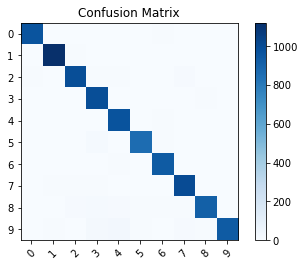

In [21]:
cm_plot_labels = range(10)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize=False)

**8. Netzwerke Speichern und Laden**

**1) Mit der model.save() Funktion**

Die save Funktion speichert:
   - Die Struktur des Modells
   - Die Gewichte des Modells
   - Die Trainings Konfigurationen (loss, optimizer)
   - Den Status des Optimizers, dadurch kann das Training direkt am Abbruchspunkt fortgesetzt werden

In [123]:
model.save('digit_recognizer_model.h5')

Nun kann das Modell inklusive Gewichten unter einem anderen Namen neu geladen werden.

In [125]:
from tensorflow.keras.models import load_model
model1 = load_model('digit_recognizer_model.h5')

**2) Mit der model.to_json() Funktion**

Speichert nur die Modell Architektur, aber keine Gewichte.

In [130]:
json_string = model.to_json()

Nun kann ein neues Modell mit der selben Architektur erstellt werden.

In [131]:
from tensorflow.keras.models import model_from_json
model2 = model_from_json(json_string)

In [132]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**3) Mit der model.save_weights() Funktion**

Speichert nur die Gewichte von des Modells.

In [ ]:
model.save_weights('my_weights.h5')

Das Netzwerk muss neu erstellt werden.

In [ ]:
model3 = Sequential([
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

Dann können die alten Gewichte geladen werden.

In [ ]:
model3.load_weights('my_weights.h5')

**9. Verwendung der Convolutional Layer:**

Für die Verwendung der **Conv2D-Layer** müssen die Trainings- und Test-Daten in die Form **(28,28,1)** gebracht werden. Die dritte Dimension stellt dabei die Farbwerte dar. Da der MNIST Datensatz mit Schwarzwerten auskommt, wird hier nur ein Wert benötigt. Bei Bildern der Größe 28x28 mit RGB Farbwerten müssten die Daten in die Form (28,28,3) gebracht werden.

In [7]:
# OPTIONAL: MNIST Daten neu laden
(train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()
train_samples = tf.keras.utils.normalize(train_samples, axis=1)
test_samples = tf.keras.utils.normalize(test_samples, axis=1)

# Input_shape festlegen
input_shape = (28, 28, 1)

# Daten in dreidimensionale Form bringen
train_samples = train_samples.reshape(len(train_samples), input_shape[0], input_shape[1], input_shape[2])
test_samples  = test_samples.reshape(len(test_samples), input_shape[0], input_shape[1], input_shape[2])

In [8]:
print(train_samples.shape)

(60000, 28, 28, 1)


In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # stride
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(units=128, activation='relu'), # Droput, weniger neuronen
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [11]:
#from keras.optimizers import Adadelta

model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_samples, train_labels, epochs=20, validation_data=(test_samples,test_labels), shuffle=True, batch_size=128)
model.save('digit_recognizer_model_conv.h5')

Epoch 1/20
469/469 [==============================] - 39s 84ms/step - loss: 0.6765 - accuracy: 0.7986 - val_loss: 0.2589 - val_accuracy: 0.9215
Epoch 2/20
469/469 [==============================] - 39s 83ms/step - loss: 0.3452 - accuracy: 0.8957 - val_loss: 0.2064 - val_accuracy: 0.9390
Epoch 3/20
469/469 [==============================] - 39s 82ms/step - loss: 0.2952 - accuracy: 0.9131 - val_loss: 0.1724 - val_accuracy: 0.9494
Epoch 4/20
469/469 [==============================] - 38s 82ms/step - loss: 0.2552 - accuracy: 0.9243 - val_loss: 0.1455 - val_accuracy: 0.9559
Epoch 5/20
469/469 [==============================] - 38s 81ms/step - loss: 0.2215 - accuracy: 0.9336 - val_loss: 0.1241 - val_accuracy: 0.9625
Epoch 6/20
469/469 [==============================] - 39s 83ms/step - loss: 0.1946 - accuracy: 0.9433 - val_loss: 0.1066 - val_accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 39s 82ms/step - loss: 0.1688 - accuracy: 0.9505 - val_loss: 0.0944 - val_accuracy:

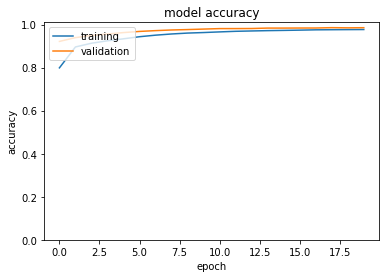

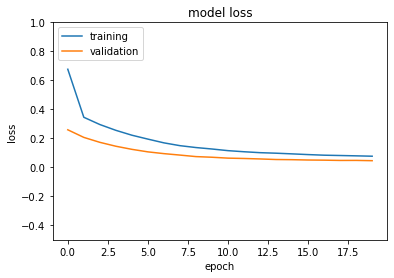

In [16]:
plot_accuracy("accuracy_graph_6.png")
plot_loss("loss_graph_6.png")